# Importing Libraries

## Hierarchical Clustring

In [232]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [233]:
crime_d=pd.read_csv("crime_data.csv")

In [234]:
crime_d.head()

,State name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [235]:
crime_d.shape

(50, 5)

In [236]:
crime_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State name  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [237]:
state_columns=crime_d["State name"]
state_columns=pd.DataFrame({"State_columns":state_columns})

In [238]:
state_columns.head()

,State_columns
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
scaler=StandardScaler()

In [241]:
crime_d.iloc[:,1:].head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [242]:
crime_scaled=scaler.fit_transform(crime_d.iloc[:,1:])

In [243]:
crime_d.iloc[:,1:].columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [244]:
column_name=['Murder', 'Assault', 'UrbanPop', 'Rape']

In [245]:
crime_scaled=pd.DataFrame(crime_scaled, columns=column_name)
crime_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [246]:
crime_scaled.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


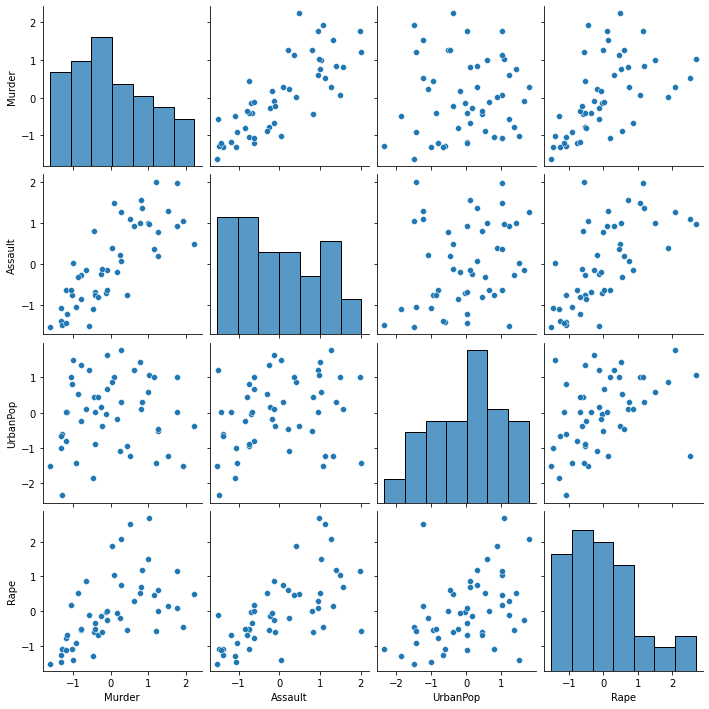

In [247]:
sns.pairplot(crime_scaled)

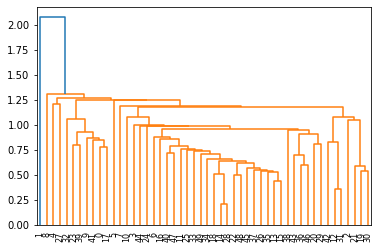

In [248]:
dendogram=sch.dendrogram(sch.linkage(crime_scaled, method="single"))

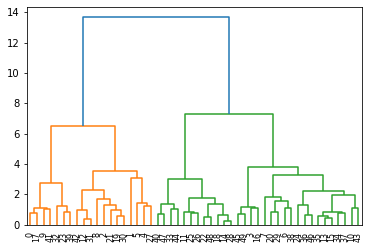

In [249]:
dendogram=sch.dendrogram(sch.linkage(crime_scaled, method="ward"))

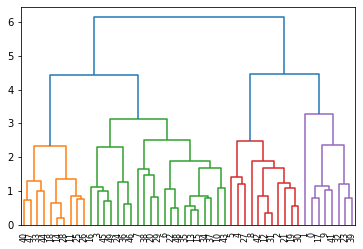

In [250]:
dendogram=sch.dendrogram(sch.linkage(crime_scaled, method="complete"))

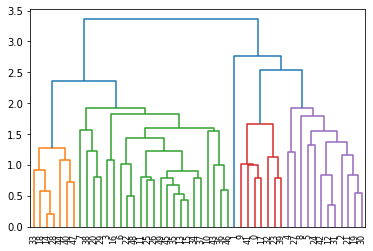

In [251]:
dendogram=sch.dendrogram(sch.linkage(crime_scaled, method="average"))

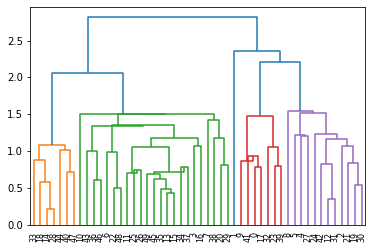

In [252]:
dendogram=sch.dendrogram(sch.linkage(crime_scaled, method="centroid"))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 2 and cut the dendrogram:

We have 4 clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 4 clusters:
going for complete linkage linkage

In [253]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [254]:
y_hc=hc.fit_predict(crime_scaled)

In [255]:
y_hc=pd.DataFrame(y_hc, columns=["Cluster ID"])
y_hc.head()

,Cluster ID
0,0
1,0
2,2
3,1
4,2


In [256]:
crime_scaled_inverse=scaler.inverse_transform(crime_scaled)
crime_scaled_inverse=pd.DataFrame(crime_scaled_inverse, columns=column_name)
crime_scaled_inverse.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236.0,58.0,21.2
1,10.0,263.0,48.0,44.5
2,8.1,294.0,80.0,31.0
3,8.8,190.0,50.0,19.5
4,9.0,276.0,91.0,40.6


In [257]:
HC_crime_data=crime_scaled_inverse

In [258]:
HC_crime_data["Cluster ID"]=y_hc

In [259]:
HC_crime_data["State"]=state_columns
HC_crime_data.head(4)

,Murder,Assault,UrbanPop,Rape,Cluster ID,State
0,13.2,236.0,58.0,21.2,0,Alabama
1,10.0,263.0,48.0,44.5,0,Alaska
2,8.1,294.0,80.0,31.0,2,Arizona
3,8.8,190.0,50.0,19.5,1,Arkansas


In [260]:
HC_crime_data["Cluster ID"].value_counts()

1    21
2    11
3    10
0     8
Name: Cluster ID, dtype: int64

In [261]:
HC_crime_data.groupby(["Cluster ID"]).mean()

,Murder,Assault,UrbanPop,Rape
Cluster ID,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [262]:
high_crime=crime_scaled_inverse[(crime_scaled_inverse["Cluster ID"]==0) | (crime_scaled_inverse["Cluster ID"]==2)]

In [263]:
high_crime.shape

(19, 6)

In [264]:
high_crime

,Murder,Assault,UrbanPop,Rape,Cluster ID,State
0,13.2,236.0,58.0,21.2,0,Alabama
1,10.0,263.0,48.0,44.5,0,Alaska
2,8.1,294.0,80.0,31.0,2,Arizona
4,9.0,276.0,91.0,40.6,2,California
5,7.9,204.0,78.0,38.7,2,Colorado
8,15.4,335.0,80.0,31.9,2,Florida
9,17.4,211.0,60.0,25.8,0,Georgia
12,10.4,249.0,83.0,24.0,2,Illinois
17,15.4,249.0,66.0,22.2,0,Louisiana
19,11.3,300.0,67.0,27.8,2,Maryland


## K Means

In [265]:
from sklearn.cluster import KMeans

In [266]:
crime_scaled.head(2)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424


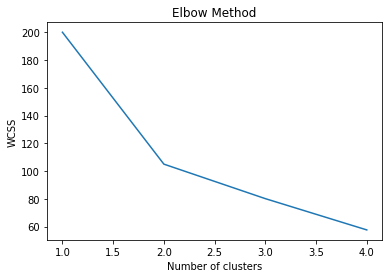

In [267]:
wcss=[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we can choose 2 as no. of clusters, this method shows what is the good number of clusters.

In [268]:
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=42)
clusters_new.fit(crime_scaled)

KMeans(n_clusters=2, random_state=42)

In [269]:
clusters_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [270]:
crime_scaled_kmeans=scaler.inverse_transform(crime_scaled)
crime_scaled_kmeans=pd.DataFrame(crime_scaled_kmeans, columns=column_name)
crime_scaled_kmeans.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236.0,58.0,21.2
1,10.0,263.0,48.0,44.5
2,8.1,294.0,80.0,31.0
3,8.8,190.0,50.0,19.5
4,9.0,276.0,91.0,40.6


In [271]:
crime_scaled_kmeans["K Means Cluster"]=clusters_new.labels_
crime_scaled_kmeans.head(2)

,Murder,Assault,UrbanPop,Rape,K Means Cluster
0,13.2,236.0,58.0,21.2,1
1,10.0,263.0,48.0,44.5,1


In [272]:
crime_scaled_kmeans["State Name"]=state_columns
crime_scaled_kmeans.head(2)

,Murder,Assault,UrbanPop,Rape,K Means Cluster,State Name
0,13.2,236.0,58.0,21.2,1,Alabama
1,10.0,263.0,48.0,44.5,1,Alaska


In [273]:
crime_scaled_kmeans["K Means Cluster"].value_counts()

0    30
1    20
Name: K Means Cluster, dtype: int64

In [274]:
crime_scaled_kmeans.groupby(["K Means Cluster"]).mean()

,Murder,Assault,UrbanPop,Rape
K Means Cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


As we can see Cluster 1 has high rate of Murder and Rape cases than cluster 0

In [275]:
high_crime_kmeans=crime_scaled_kmeans[crime_scaled_kmeans["K Means Cluster"]==1]

In [276]:
## Hierarchical Cluster output
high_crime_kmeans.describe()

,Murder,Assault,UrbanPop,Rape,K Means Cluster
count,20.000000,20.00000,20.000000,20.000000,20.0
mean,12.165000,255.25000,68.400000,29.165000,1.0
std,2.684904,44.11692,14.463748,8.386473,0.0
min,7.900000,178.00000,44.000000,16.100000,1.0
25%,10.300000,229.75000,58.750000,23.625000,1.0
50%,12.150000,254.50000,70.000000,27.350000,1.0
75%,13.500000,280.50000,80.000000,32.850000,1.0
max,17.400000,337.00000,91.000000,46.000000,1.0


In [277]:
## K- Means Cluster output
high_crime.describe()

,Murder,Assault,UrbanPop,Rape,Cluster ID
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,12.331579,259.315789,68.315789,29.215789,1.157895
std,2.650168,41.297098,14.855050,8.613121,1.014515
min,7.900000,188.000000,44.000000,16.100000,0.000000
25%,10.750000,242.500000,58.500000,23.250000,0.000000
50%,12.200000,255.000000,70.000000,26.900000,2.000000
75%,13.800000,282.000000,80.000000,33.600000,2.000000
max,17.400000,337.000000,91.000000,46.000000,2.000000


## DB SCAN

In [278]:
from sklearn.cluster import DBSCAN
crime_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


eps: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

minPoints: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.

In [279]:
dbscan = DBSCAN(eps=1.3, min_samples=6)
dbscan.fit(crime_scaled)

DBSCAN(eps=1.3, min_samples=6)

In [280]:
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2,  1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [281]:
db_crimdata=pd.DataFrame(crime_scaled_inverse.iloc[:,:4], columns=column_name)

In [282]:
db_crimdata.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236.0,58.0,21.2
1,10.0,263.0,48.0,44.5
2,8.1,294.0,80.0,31.0
3,8.8,190.0,50.0,19.5
4,9.0,276.0,91.0,40.6


In [283]:
db_crimdata["State"]=state_columns
db_crimdata["DB_Cluster"]=dbscan.labels_

In [284]:
db_crimdata.head(5)

,Murder,Assault,UrbanPop,Rape,State,DB_Cluster
0,13.2,236.0,58.0,21.2,Alabama,0
1,10.0,263.0,48.0,44.5,Alaska,-1
2,8.1,294.0,80.0,31.0,Arizona,1
3,8.8,190.0,50.0,19.5,Arkansas,2
4,9.0,276.0,91.0,40.6,California,-1


In [285]:
db_crimdata[db_crimdata["DB_Cluster"]==-1].value_counts()

Murder  Assault  UrbanPop  Rape  State           DB_Cluster
9.0     276.0    91.0      40.6  California      -1            1
10.0    263.0    48.0      44.5  Alaska          -1            1
13.0    337.0    45.0      16.1  North Carolina  -1            1
15.4    335.0    80.0      31.9  Florida         -1            1
dtype: int64

In [286]:
index_number=db_crimdata[db_crimdata["DB_Cluster"]==-1].index
index_number

Int64Index([1, 4, 8, 32], dtype='int64')

In [287]:
db_crimdata.drop(index_number, inplace=True)

In [288]:
db_crimdata.reset_index().drop(["index"], axis=1, inplace=True)
db_crimdata.head()

,Murder,Assault,UrbanPop,Rape,State,DB_Cluster
0,13.2,236.0,58.0,21.2,Alabama,0
2,8.1,294.0,80.0,31.0,Arizona,1
3,8.8,190.0,50.0,19.5,Arkansas,2
5,7.9,204.0,78.0,38.7,Colorado,1
6,3.3,110.0,77.0,11.1,Connecticut,2


In [289]:
db_crimdata["DB_Cluster"].value_counts()

2    32
1     8
0     6
Name: DB_Cluster, dtype: int64

In [290]:
db_crimdata.groupby("DB_Cluster").mean()

,Murder,Assault,UrbanPop,Rape
DB_Cluster,,,,
0,14.95000,237.000,55.833333,22.616667
1,10.56250,261.625,77.375000,32.600000
2,5.24375,119.125,64.343750,16.625000


In [291]:
# As we can see Cluster 0 has higher crime rate than cluster 1 as per DB Clustering
db_crimdata_high=db_crimdata[(db_crimdata["DB_Cluster"]==0)|(db_crimdata["DB_Cluster"]==1)]

In [292]:
# DB SCAN Cluster Output
db_crimdata_high.describe()

,Murder,Assault,UrbanPop,Rape,DB_Cluster
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,12.442857,251.071429,68.142857,28.321429,0.571429
std,2.769536,33.155726,13.090555,7.685669,0.513553
min,7.900000,188.000000,44.000000,17.100000,0.000000
25%,11.150000,239.250000,59.250000,22.875000,0.000000
50%,12.150000,253.000000,68.500000,26.500000,1.000000
75%,14.100000,274.000000,79.500000,31.825000,1.000000
max,17.400000,300.000000,86.000000,46.000000,1.000000


In [293]:
## Hierarchical Cluster output
high_crime_kmeans.describe()

,Murder,Assault,UrbanPop,Rape,K Means Cluster
count,20.000000,20.00000,20.000000,20.000000,20.0
mean,12.165000,255.25000,68.400000,29.165000,1.0
std,2.684904,44.11692,14.463748,8.386473,0.0
min,7.900000,178.00000,44.000000,16.100000,1.0
25%,10.300000,229.75000,58.750000,23.625000,1.0
50%,12.150000,254.50000,70.000000,27.350000,1.0
75%,13.500000,280.50000,80.000000,32.850000,1.0
max,17.400000,337.00000,91.000000,46.000000,1.0


In [294]:
## K- Means Cluster output
high_crime.describe()

,Murder,Assault,UrbanPop,Rape,Cluster ID
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,12.331579,259.315789,68.315789,29.215789,1.157895
std,2.650168,41.297098,14.855050,8.613121,1.014515
min,7.900000,188.000000,44.000000,16.100000,0.000000
25%,10.750000,242.500000,58.500000,23.250000,0.000000
50%,12.200000,255.000000,70.000000,26.900000,2.000000
75%,13.800000,282.000000,80.000000,33.600000,2.000000
max,17.400000,337.000000,91.000000,46.000000,2.000000
